In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import linregress

Implement the above model for a L × L lattice with L = 25 and plot the sequence of avalanches as a function of time. The avalanche size is defined as the number of single-site relaxations until the new relaxed state is reached. Convince yourself when steady state dynamics is reached (this critical attractor is characterized by avalanches that do not anymore increase in size)

In [8]:
def SOC(L, transient_grains, data_grains):
    
    lattice = np.zeros((L, L), dtype=int)
    avalanche_size = []

    
    total_grains= transient_grains + data_grains


    for grains in range(total_grains):
        
        x = np.random.randint(0, L)
        y = np.random.randint(0, L)
        avalanche = 0
        t=0
        
        lattice[x, y] += 1
        

        
        while np.any(lattice > 1):
            
            change_lattice = np.zeros_like(lattice)
            
            for i in range(L):
                for j in range(L):
                    if lattice[i, j] > 1:  
                        change_lattice[i, j] -= 2  
                        
                        
                        for grain in range(2):
                            direction = np.random.choice(['up', 'down', 'left', 'right'])
                            
                            if direction == 'up' and i > 0:
                                change_lattice[i-1, j] += 1
                            
                            elif direction == 'down' and i < L-1:
                                change_lattice[i+1, j] += 1
                            
                            elif direction == 'left' and j > 0:
                                change_lattice[i, j-1] += 1
                            
                            elif direction == 'right' and j < L-1:
                                change_lattice[i, j+1] += 1
                            

                        avalanche += 1
          
            lattice +=change_lattice
            
            
            if grains >= transient_grains:       
                avalanche_size.append(avalanche)
               
    

    return avalanche_size


In [18]:
L_list= [25, 50, 100, 200]
transient_grains= 500
data_grains = 9000

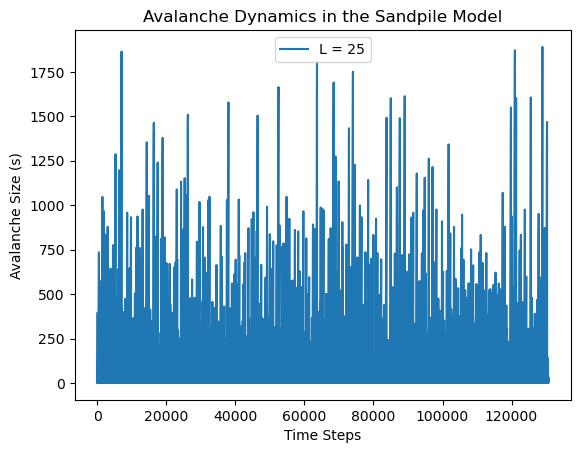

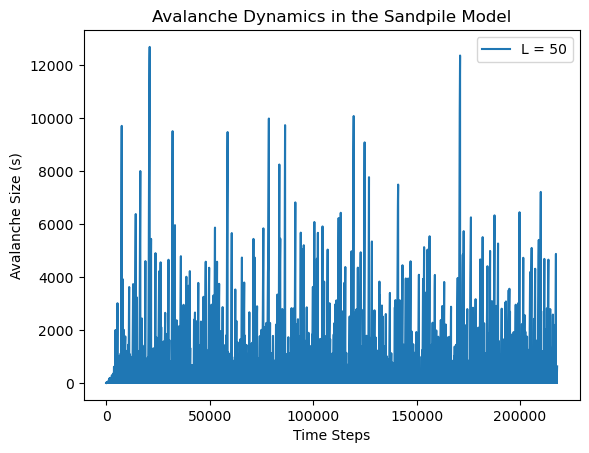

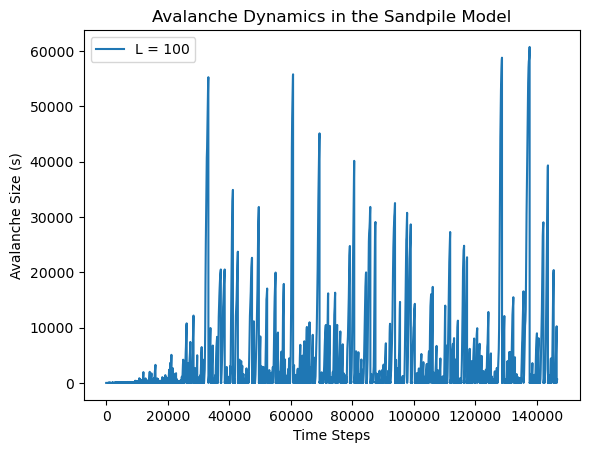

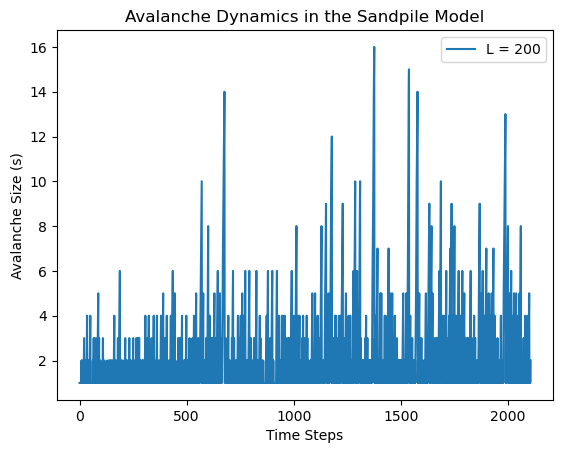

In [19]:

for L in L_list:
    avalanche_size = SOC(L,transient_grains, data_grains)
    
    
    plt.plot(avalanche_size, label=f'L = {L}')
    
    
    
    plt.xlabel('Time Steps')
    plt.ylabel('Avalanche Size (s)')
    plt.title('Avalanche Dynamics in the Sandpile Model')
    plt.legend()
    plt.show()
    

Consider system sizes L = 25, L = 50, L = 100 and L = 200 and simulate each system until a steady state is reached. In steady state, you should extract the size distribution of the avalanches, and estimate the exponent for the size distribution and for the scaling of the avalanche cut off with system size L (dimension of avalanches) 4pt.

Estimated tau for L=25: 1.65
Estimated cutoff for L=25: 2.425160
Estimated tau for L=50: 1.34
Estimated cutoff for L=50: 2.447099
Estimated tau for L=100: 0.78
Estimated cutoff for L=100: 2.427475
Estimated tau for L=200: 3.10
Estimated cutoff for L=200: 0.545526


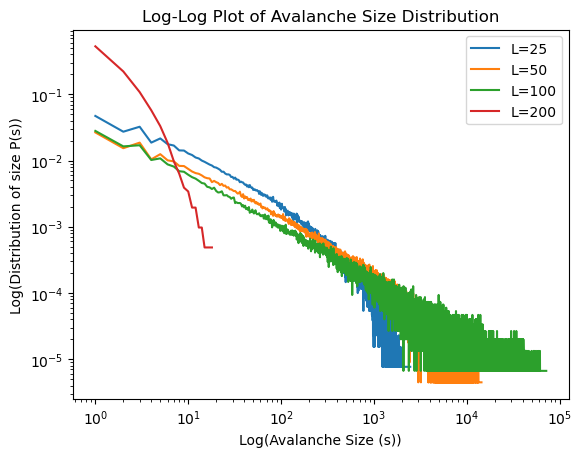

In [20]:

tau_values=[]
cutoff_values= []
for L in L_list:
    avalanche_size = SOC(L,transient_grains, data_grains)

    diff_sizes, counts = np.unique(avalanche_size, return_counts=True)
    size_distribution = counts / counts.sum() 
    
    fit_region= (diff_sizes>1)
    if np.any(fit_region):
        slope, intercept, r_value, p_value, std_err = linregress(np.log10(diff_sizes[fit_region]), np.log10(size_distribution[fit_region]))
        
        tau= - slope
        
#         if 1<tau<3/2:
            
        tau_values.append(tau)
            
        print(f"Estimated tau for L={L}: {tau:.2f}")
    
    max_size= np.max(diff_sizes)
    cutoff = np.log10(max_size)/np.log10(L)
    cutoff_values.append(cutoff)
    
    print(f"Estimated cutoff for L={L}: {cutoff:2f}")
    
    plt.loglog(diff_sizes, size_distribution,  label=f'L={L}')

plt.xlabel('Log(Avalanche Size (s))')
plt.ylabel('Log(Distribution of size P(s))')
plt.title('Log-Log Plot of Avalanche Size Distribution')
plt.legend()
plt.show()


2/3


In [26]:
def edge_grains(L, data_grains_new):
    
    new_avalanche_size=[]
    
    new_lattice= np.zeros((L,L), dtype=int)
    
    for grains in range(data_grains_new):
        
        edge_choice = np.random.randint(0, 4)  
        if edge_choice == 0:  
            new_x = 0
            new_y = np.random.randint(0, L)
        elif edge_choice == 1:  
            new_x = np.random.randint(0, L)
            new_y = L - 1
        elif edge_choice == 2:  
            new_x = L - 1
            new_y = np.random.randint(0, L)
        elif edge_choice == 3:  
            new_x = np.random.randint(0, L)
            new_y = 0
        
        avalanche = 0
        
      
        if new_lattice[new_x, new_y] == 0:
            new_lattice[new_x, new_y] += 1
            avalanche += 1
        
        
        new_avalanche_size.append(avalanche)
    return new_avalanche_size


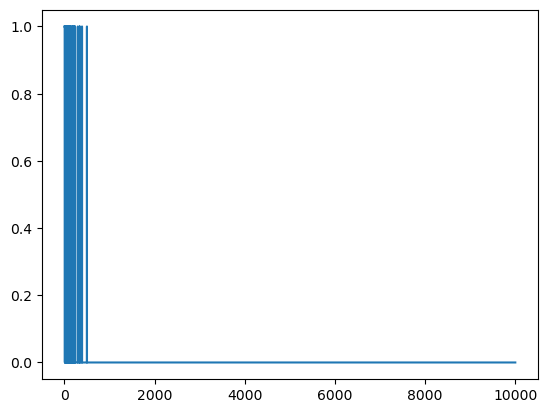

In [28]:
avalanche=edge_grains(25, 10000)
plt.plot(avalanche)